# Linear Regression - Animation

[Coding Elements](http://www.codingelements.com)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.datasets import make_regression

In [ ]:
X, y = make_regression(n_samples=500, n_features=1, bias=4.2, noise=5.5)
print(X.shape, y.shape)

# plt.plot(X, y, '.') # Can be plotted only if n_features = 1
# plt.show()

(500, 1) (500,)


In [ ]:
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

print(X_train.shape)
print(X_test.shape)

print(y_test.shape)

400
(400, 1)
(100, 1)
(100,)


In [ ]:
## Methods we need to write
def hypothesis(x,w):
    x0 = 1
    return w[0]*x0 + w[1]*x

def get_error(x,w, y_true):
    err = 0.0
    m = x.shape[0]
    
    for ix in range(m):
        err += (y_true[ix] - hypothesis(x[ix], w))**2
        
    err = err/2*m
    return err


In [ ]:
def get_grad(x,w,y_true):
    grad_0 = 0.0
    grad_1 = 0.0
    
    m = x.shape[0]
    
    for ix in range(m):
        grad_0 += (y_true[ix] - hypothesis(x[ix], w))*(-1)
        grad_1 += (y_true[ix] - hypothesis(x[ix], w))*(-1*x[ix])
        
    grad_0 = grad_0/m
    grad_1 = grad_1/m
    
    return [grad_0, grad_1]

In [ ]:
def gradient_descent(x,w,y_true, learning_rate=0.1):
    error = get_error(x,w, y_true)
    
    [grad_0, grad_1] = get_grad(x, w, y_true)
    
    w[0] = w[0] - learning_rate*grad_0
    w[1] = w[1] - learning_rate*grad_1
    
    return error, w

<IPython.core.display.Javascript object>


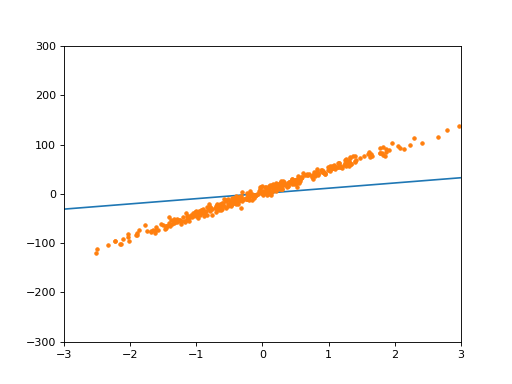

In [ ]:
import time

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

def show(W):   
    print('*', end=' ')
    ax.clear()

    # Plot a line from slope and intercept
    
    slope = W[1]
    intercept = W[0]
    
    ax.set_xlim([-3, 3])
    ax.set_ylim([-300, 300])
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals)
    
    # Plot all points
    ax.plot(X_train, y_train, '.')
    #ax.plot(X_test, y_test, '.')
    
    fig.canvas.draw()
    
    #time.sleep(0.5)

In [ ]:
W = np.array([0.1, 0.1])
loss = []

for ix in range(400): #400
    er, W = gradient_descent(X_train, W, y_train, learning_rate=0.01)
    show(W)
    loss.append(er)
    
print(W)

* * * * * * * * * * * * * * * * * * * * * * * * * 

In [ ]:
# plt.plot(loss)
# plt.show()

print(loss[-1])